In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

cat_id = 'MCO1000'
data = []
for offset in range(0, 1000, 50):
    url = f'https://api.mercadolibre.com/sites/MCO/search?category={cat_id}&offset={offset}'
    response = requests.get(url)
    items = response.json()
    if 'results' in items:
        data.extend(items['results'])
    else:
        print(f"No se encontró la clave 'results' en la respuesta para el offset {offset}")
sellers = [item['seller'] for item in data]
sellers_data = pd.json_normalize(sellers)
items_data = pd.json_normalize(data)
# df = pd.DataFrame(data)

In [3]:
import requests
cats = requests.get('https://api.mercadolibre.com/sites/MCO/categories')
json_data = cats.json()
dc = pd.json_normalize(json_data)
dc

,id,name
0,MCO1747,Accesorios para Vehículos
1,MCO441917,Agro
2,MCO1403,Alimentos y Bebidas
3,MCO1071,Animales y Mascotas
4,MCO1367,Antigüedades y Colecciones
5,MCO1368,"Arte, Papelería y Mercería"
6,MCO1384,Bebés
7,MCO1246,Belleza y Cuidado Personal
8,MCO40433,Boletas para Espectáculos
9,MCO1039,Cámaras y Accesorios


In [26]:
items_data.columns.to_list()

['id',
 'title',
 'condition',
 'thumbnail_id',
 'catalog_product_id',
 'listing_type_id',
 'permalink',
 'buying_mode',
 'site_id',
 'category_id',
 'domain_id',
 'thumbnail',
 'currency_id',
 'order_backend',
 'price',
 'original_price',
 'sale_price',
 'sold_quantity',
 'available_quantity',
 'official_store_id',
 'use_thumbnail_id',
 'accepts_mercadopago',
 'tags',
 'stop_time',
 'attributes',
 'winner_item_id',
 'catalog_listing',
 'discounts',
 'promotions',
 'inventory_id',
 'shipping.store_pick_up',
 'shipping.free_shipping',
 'shipping.logistic_type',
 'shipping.mode',
 'shipping.tags',
 'shipping.promise',
 'seller.id',
 'seller.nickname',
 'seller.car_dealer',
 'seller.real_estate_agency',
 'seller._',
 'seller.registration_date',
 'seller.tags',
 'seller.car_dealer_logo',
 'seller.permalink',
 'seller.seller_reputation.level_id',
 'seller.seller_reputation.power_seller_status',
 'seller.seller_reputation.transactions.canceled',
 'seller.seller_reputation.transactions.comple

In [4]:
variables = ['seller.id','sold_quantity','price','category_id']
base_items = items_data[variables].copy()
base_items.rename(columns={'seller.id' : 'seller_id'}, inplace=True)
base_items['gmv'] = base_items['sold_quantity']*base_items['price']
base_items

,seller_id,sold_quantity,price,category_id,gmv
0,139705540,5,114890,MCO3697,574450
1,1207093176,250,1749980,MCO14903,437495000
2,1051017434,250,31000,MCO3697,7750000
3,76085013,250,173300,MCO420273,43325000
4,1207093176,50,1049900,MCO14903,52495000
...,...,...,...,...,...
994,86356308,500,107000,MCO420273,53500000
995,467990121,0,2867345,MCO14903,0
996,30055805,5,551790,MCO4633,2758950
997,110187976,500,17900,MCO113161,8950000


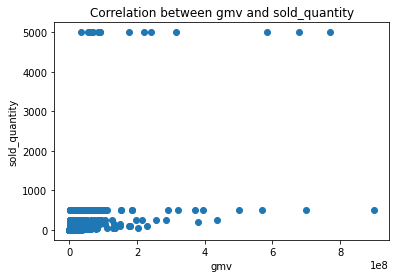

0.4243405319384147

In [5]:
plt.scatter(base_items['gmv'], base_items['sold_quantity'])
plt.xlabel('gmv')
plt.ylabel('sold_quantity')
plt.title('Correlation between gmv and sold_quantity')
plt.show()
base_items['gmv'].corr(base_items['sold_quantity'])

In [6]:
#sellers_data = pd.json_normalize(df['seller'])
s_variables = ['id','registration_date','seller_reputation.metrics.sales.completed','seller_reputation.transactions.ratings.positive']
base_sellers = sellers_data[s_variables].copy()
base_sellers.rename(columns={'seller_reputation.metrics.sales.completed' : 'last_60d_sales','id' : 'seller_id', 'seller_reputation.transactions.ratings.positive' : 'positive_reviews'}, inplace=True)
base_sellers

,seller_id,registration_date,last_60d_sales,positive_reviews
0,139705540,2013-06-04T10:40:19.000-04:00,3836,0.98
1,1207093176,2022-09-28T13:24:35.000-04:00,3946,0.61
2,1051017434,2022-01-04T14:38:59.000-04:00,722,0.87
3,76085013,2004-10-05T20:08:36.000-04:00,1955,0.96
4,1207093176,2022-09-28T13:24:35.000-04:00,3946,0.61
...,...,...,...,...
994,86356308,2005-10-14T14:42:07.000-04:00,164,0.97
995,467990121,2019-09-04T02:34:38.000-04:00,927,0.83
996,30055805,2010-06-28T14:32:18.000-04:00,362,0.95
997,110187976,2012-04-22T21:27:35.000-04:00,3536,0.97


In [7]:
conn = sqlite3.connect(':memory:')
base_sellers.to_sql('s', conn, index=False)
base_items.to_sql('i', conn, index=False)
query = '''
SELECT
    s.seller_id,
    SUM(i.sold_quantity) / ((julianday('now') - julianday(MIN(s.registration_date))) / 30) AS sales_per_30d,
    MAX(s.last_60d_sales) AS last_60d_sales,
    SUM(i.gmv) / ((julianday('now') - julianday(MIN(s.registration_date))) / 30) AS gmv_per_30d,
    MAX(positive_reviews) AS positive_reviews_pct
FROM
    s
INNER JOIN
    i 
    ON s.seller_id = i.seller_id
GROUP BY
    s.seller_id
'''
variables_scoring = pd.read_sql_query(query, conn)
conn.close()
variables_scoring

,seller_id,sales_per_30d,last_60d_sales,gmv_per_30d,positive_reviews_pct
0,1066358,0.024736,138,1.632308e+03,0.97
1,1135555,1.237065,3582,3.575119e+04,0.89
2,1476510,0.000000,126,0.000000e+00,1.00
3,1707703,0.024875,224,3.681513e+03,0.98
4,2417328,0.124539,489,2.900523e+04,0.98
...,...,...,...,...,...
370,1293711504,0.464460,236,8.778295e+03,0.61
371,1318538354,0.000000,11,0.000000e+00,1.00
372,1345286920,2.545587,292,4.887526e+04,0.50
373,1351448982,2.997408,265,1.016121e+05,0.67


In [8]:
metrics = variables_scoring.columns[1:]

for metric in metrics:
    quintiles = pd.qcut(variables_scoring[metric], q=5, labels=False) + 1
    variables_scoring[f'{metric}_score'] = quintiles
variables_scoring

,seller_id,sales_per_30d,last_60d_sales,gmv_per_30d,positive_reviews_pct,sales_per_30d_score,last_60d_sales_score,gmv_per_30d_score,positive_reviews_pct_score
0,1066358,0.024736,138,1.632308e+03,0.97,1,2,1,4
1,1135555,1.237065,3582,3.575119e+04,0.89,3,5,2,2
2,1476510,0.000000,126,0.000000e+00,1.00,1,1,1,5
3,1707703,0.024875,224,3.681513e+03,0.98,1,2,1,5
4,2417328,0.124539,489,2.900523e+04,0.98,2,3,2,5
...,...,...,...,...,...,...,...,...,...
370,1293711504,0.464460,236,8.778295e+03,0.61,3,2,2,1
371,1318538354,0.000000,11,0.000000e+00,1.00,1,1,1,5
372,1345286920,2.545587,292,4.887526e+04,0.50,4,2,3,1
373,1351448982,2.997408,265,1.016121e+05,0.67,4,2,3,1


In [9]:
quintil_sales_per_30d, bin_1 = pd.qcut(variables_scoring['sales_per_30d'], q=5, labels=False, retbins= True)
quintil_last_60d_sales, bin_2 = pd.qcut(variables_scoring['last_60d_sales'], q=5, labels=False, retbins= True)
quintil_gmv_per_30d, bin_3 = pd.qcut(variables_scoring['gmv_per_30d'], q=5, labels=False, retbins= True)
quintil_positive_reviews_pct, bin_4 = pd.qcut(variables_scoring['positive_reviews_pct'], q=5, labels=False, retbins= True)

print('Cortes sales_per_30d:',"",'1:',bin_1[1],', 2:',bin_1[2],', 3:',bin_1[3],', 4:',bin_1[4] )
print('Cortes last_60d_sales:',"",'1:',bin_2[1],', 2:',bin_2[2],', 3:',bin_2[3],', 4:',bin_2[4])
print('Cortes gmv_per_30d:',"",'1:',bin_3[1],', 2:',bin_3[2],', 3:',bin_3[3],', 4:',bin_3[4])
print('Cortes positive_reviews_pct:',"",'1:',bin_4[1],', 2:',bin_4[2],', 3:',bin_4[3],', 4:',bin_4[4])

Cortes sales_per_30d:  1: 0.03160228084198505 , 2: 0.21090523741834652 , 3: 2.486777848893234 , 4: 12.21817964088888
Cortes last_60d_sales:  1: 126.0 , 2: 292.0 , 3: 642.6000000000001 , 4: 1359.1999999999998
Cortes gmv_per_30d:  1: 5552.746871910602 , 2: 44503.231925083855 , 3: 223375.17575383003 , 4: 1237173.9269720707
Cortes positive_reviews_pct:  1: 0.858 , 2: 0.9159999999999999 , 3: 0.95 , 4: 0.97


In [23]:
pct_sales_per_30d = float(input("Ingrese el peso para 'sales_per_30d': "))
pct_last_60d_sales = float(input("Ingrese el peso para 'last_60d_sales': "))
pct_gmv_per_30d = float(input("Ingrese el peso para 'gmv_per_30d': "))
pct_positive_reviews_pct = float(input("Ingrese el peso para 'positive_reviews_pct': "))

user_id = input("Ingrese el ID de usuario (dejar en blanco para mostrar todos los puntajes): ")

if round(pct_sales_per_30d + pct_last_60d_sales + pct_gmv_per_30d + pct_positive_reviews_pct,2) == 1 and pct_sales_per_30d <= 1 and pct_last_60d_sales <= 1 and pct_gmv_per_30d <= 1 and pct_positive_reviews_pct <= 1:
    variables_scoring['global_score'] = (pct_sales_per_30d * variables_scoring['sales_per_30d_score']) + (pct_last_60d_sales * variables_scoring['last_60d_sales_score']) + (pct_gmv_per_30d * variables_scoring['gmv_per_30d_score']) + (pct_positive_reviews_pct * variables_scoring['positive_reviews_pct_score'])
    print(variables_scoring['global_score'])
else: 
    print('Pesos mal asignados, deben ser menores a 1 y sumar 1 entre los cuatro')

0      1.5
1      4.0
2      1.0
3      1.5
4      2.5
      ... 
370    2.5
371    1.0
372    3.0
373    3.0
374    3.0
Name: global_score, Length: 375, dtype: float64


In [51]:
pct_sales_per_30d = float(input("Ingrese el peso para 'sales_per_30d': "))
pct_last_60d_sales = float(input("Ingrese el peso para 'last_60d_sales': "))
pct_gmv_per_30d = float(input("Ingrese el peso para 'gmv_per_30d': "))
pct_positive_reviews_pct = float(input("Ingrese el peso para 'positive_reviews_pct': "))

seller_id = input("Ingrese el ID de vendedor (dejar en blanco para mostrar todos los puntajes): ")

if round(pct_sales_per_30d + pct_last_60d_sales + pct_gmv_per_30d + pct_positive_reviews_pct, 2) == 1 and pct_sales_per_30d <= 1 and pct_last_60d_sales <= 1 and pct_gmv_per_30d <= 1 and pct_positive_reviews_pct <= 1:
    if seller_id == "":
        variables_scoring['global_score'] = (pct_sales_per_30d * variables_scoring['sales_per_30d_score']) + (pct_last_60d_sales * variables_scoring['last_60d_sales_score']) + (pct_gmv_per_30d * variables_scoring['gmv_per_30d_score']) + (pct_positive_reviews_pct * variables_scoring['positive_reviews_pct_score'])
        print(variables_scoring['global_score'])
    else:
        # Filtrar por ID de vendedor
        seller_scores = variables_scoring.loc[variables_scoring['seller_id'] == float(seller_id)].copy()
        seller_scores.loc[:, 'global_score'] = (pct_sales_per_30d * seller_scores['sales_per_30d_score']) + (pct_last_60d_sales * seller_scores['last_60d_sales_score']) + (pct_gmv_per_30d * seller_scores['gmv_per_30d_score']) + (pct_positive_reviews_pct * seller_scores['positive_reviews_pct_score'])
        print(seller_scores['global_score'])
        
else: 
    print('Pesos mal asignados, deben ser menores a 1 y sumar 1 entre los cuatro')


Ingrese el peso para 'sales_per_30d':  1
Ingrese el peso para 'last_60d_sales':  0
Ingrese el peso para 'gmv_per_30d':  0
Ingrese el peso para 'positive_reviews_pct':  0
Ingrese el ID de vendedor (dejar en blanco para mostrar todos los puntajes):  


0      1.0
1      3.0
2      1.0
3      1.0
4      2.0
      ... 
370    3.0
371    1.0
372    4.0
373    4.0
374    3.0
Name: global_score, Length: 375, dtype: float64
